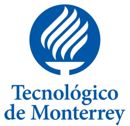

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Navegación autónoma**
### Tecnológico de Monterrey
###  	Dr. David Antonio Torres

#### **Actividad 4.1 - Ejercicio de clasificación con Keras**
____


**Nombres y matrículas de los integrantes del equipo:**

*   Julio Cesar Lynn Jimenez A01793660
*   Francisco Javier Parga García A01794380
*   Carlos Roberto Torres Ferguson A01215432
*   Fernando Sebastian Sanchez Cardona A01687530

____

### Se monta la carpeta con el dataset para la detección de peatones

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0. Librerias requerias

In [ ]:
# Cargar librerias

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import glob

from matplotlib import rcParams
rcParams['figure.figsize'] = (5,3)

# 1. Carga de datos de peatones

In [ ]:
# Reemplazar las fuentes de datos de vehículos y no vehículos con el Conjunto de Datos de Personas INRIA
pedestrian = glob.glob("train_64x128_H96/pos/*.png")
non_pedestrian = glob.glob("train_64x128_H96/neg/*.png")

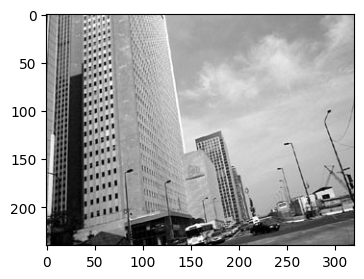

In [ ]:
# Leer y mostrar una imagen de no peatón en color
img_color = cv2.imread(non_pedestrian[0])
plt.imshow(img_color)

# Convertir y mostrar la imagen de no peatón en escala de grises
img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap="gray");

# 2. Propiedades de imagenes con y sin peatones

## Peatones

In [ ]:
# Inicializar una lista vacía para almacenar las imágenes de peatones
pedestrian_accum = np.empty((0, 128, 64), dtype=np.float64) 

for i in range(len(pedestrian)):
  path = pedestrian[i]
  # Leer la imagen en color
  img_color = mpimg.imread(path)
  # Cambiar el tamaño de la imagen a un tamaño fijo (por ejemplo, (64, 64))
  img_color = cv2.resize(img_color, (64, 128))
  # Convertir la imagen a escala de grises
  img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
  # Añadir la imagen a la lista
  pedestrian_accum = np.append(pedestrian_accum, [img_gray], axis=0)

In [ ]:
# Apilar las imagenes en un array de numpy y convertirlo a tipo float
#X_pedestrian = np.vstack(pedestrian_accum).astype(np.float64)
X_pedestrian = pedestrian_accum
# Crear un array de numpy de ceros como las etiquetas para las imágenes de peatones
y_pedestrian = np.ones(len(X_pedestrian))

## NO - Peatones

In [ ]:
# Inicializar una lista vacía para almacenar las imágenes de no peatones
non_pedestrian_accum = np.empty((0, 128, 64), dtype=np.float64)

for i in range(len(non_pedestrian)):

  path = non_pedestrian[i]

  # Leer la imagen en color
  img_color = mpimg.imread(path)
 
  # Cambiar el tamaño de la imagen a un tamaño fijo (por ejemplo, (64, 64))
  img_color = cv2.resize(img_color, (64, 128))
 
  # Convertir la imagen a escala de grises
  img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
 
  # Añadir la imagen a la lista
  non_pedestrian_accum = np.append(non_pedestrian_accum, [img_gray], axis=0)

In [ ]:
# Apilar las las imagenes en un array de numpy y convertirlo a tipo float
# X_non_pedestrian = np.vstack(non_pedestrian_accum).astype(np.float64)
X_non_pedestrian = non_pedestrian_accum
# Crear un array de numpy de ceros como las etiquetas para las imágenes de no peatones
y_non_pedestrian = np.zeros(len(X_non_pedestrian))

In [ ]:
# Combinar los datos de peatones y no peatones
X = np.vstack((X_pedestrian,X_non_pedestrian))
y = np.hstack((y_pedestrian,y_non_pedestrian))

# 3. Separacion del dato para entrenamiento y prueba

In [ ]:
# Importar la biblioteca para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Dividir los datos en un 70% de entrenamiento y un 30% de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 128, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 64, 1)

# Se define el modelo

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout

In [ ]:
num_pixels = 128 * 64
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [ ]:
model = Sequential()
model.add(Dense(units = 32, input_dim=num_pixels, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 16, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 1, activation='sigmoid')) # Porque solo clasificamos en peaton y no-peaton
model.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 32)                262176    
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 262,721
Trainable params: 262,721
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 1000, verbose = 1, shuffle = 1)

Epoch 1/10
3/3 [==============================] - 2s 315ms/step - loss: 5.4076 - accuracy: 0.5040 - val_loss: 6.6249 - val_accuracy: 0.7137
Epoch 2/10
3/3 [==============================] - 0s 45ms/step - loss: 7.0515 - accuracy: 0.7163 - val_loss: 0.6780 - val_accuracy: 0.8333
Epoch 3/10
3/3 [==============================] - 0s 48ms/step - loss: 2.8870 - accuracy: 0.6130 - val_loss: 0.6317 - val_accuracy: 0.8504
Epoch 4/10
3/3 [==============================] - 0s 44ms/step - loss: 1.2450 - accuracy: 0.8144 - val_loss: 2.3365 - val_accuracy: 0.7222
Epoch 5/10
3/3 [==============================] - 0s 49ms/step - loss: 1.5338 - accuracy: 0.7920 - val_loss: 1.3847 - val_accuracy: 0.6496
Epoch 6/10
3/3 [==============================] - 0s 39ms/step - loss: 1.3311 - accuracy: 0.6840 - val_loss: 0.6470 - val_accuracy: 0.8376
Epoch 7/10
3/3 [==============================] - 0s 41ms/step - loss: 0.7107 - accuracy: 0.8582 - val_loss: 1.0361 - val_accuracy: 0.8248
Epoch 8/10
3/3 [==========

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

32/32 [==============================] - 0s 8ms/step - loss: 0.5027 - accuracy: 0.8721
Test loss: 0.5026537775993347
Test accuracy: 0.872127890586853


Text(0.5, 0, 'epoch')

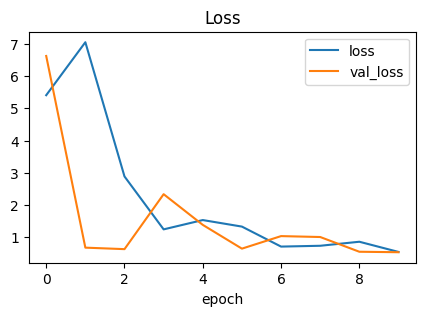

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

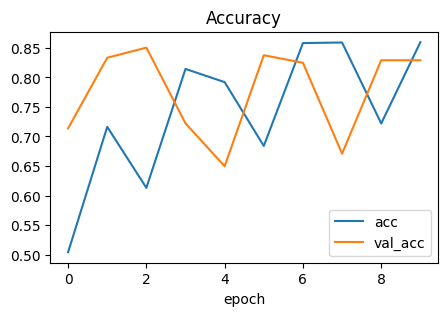

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

# Se define el modelo LeNet

In [ ]:
X_train_lenet = X_train.reshape(X_train.shape[0], 128, 64, 1)
X_test_lenet = X_test.reshape(X_test.shape[0], 128, 64, 1)

In [ ]:
model_lenet = Sequential()

model_lenet.add(Conv2D(filters = 32, kernel_size = (5, 5), input_shape=(128, 64, 1), activation='relu'))
# model_lenet.add(Conv2D(filters = 32, kernel_size = (5, 5), activation='relu'))
model_lenet.add(MaxPooling2D(pool_size=(2, 2)))
# model_lenet.add(Dropout(0.25))

model_lenet.add(Conv2D(filters = 64, kernel_size = (5, 5), activation='relu'))
# model_lenet.add(Conv2D(filters = 64, kernel_size = (5, 5), activation='relu'))
model_lenet.add(MaxPooling2D(pool_size=(2, 2)))
# model_lenet.add(Dropout(0.25))

# Flatten hace unidimensional las imágenes resultantes
model_lenet.add(Flatten())
# Fully connected
model_lenet.add(Dense(units = 512, activation='relu'))
model_lenet.add(Dropout(0.5))
# Fully connected
model_lenet.add(Dense(units = 1, activation='sigmoid')) # Porque solo clasificamos en peaton y no-peaton

model_lenet.compile(Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])
print(model_lenet.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 124, 60, 32)       832       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 62, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 58, 26, 64)        51264     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 29, 13, 64)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 24128)             0         
                                                                 
 dense_20 (Dense)            (None, 512)             

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history_lenet = model_lenet.fit(X_train_lenet, y_train, validation_split=0.1, epochs = 10, verbose = 1, shuffle = 1)

Epoch 1/10
66/66 [==============================] - 3s 21ms/step - loss: 2.7033 - accuracy: 0.7006 - val_loss: 0.5644 - val_accuracy: 0.7137
Epoch 2/10
66/66 [==============================] - 1s 12ms/step - loss: 0.4140 - accuracy: 0.8168 - val_loss: 0.2949 - val_accuracy: 0.8590
Epoch 3/10
66/66 [==============================] - 1s 12ms/step - loss: 0.3239 - accuracy: 0.8686 - val_loss: 0.2848 - val_accuracy: 0.8889
Epoch 4/10
66/66 [==============================] - 3s 41ms/step - loss: 0.3127 - accuracy: 0.8672 - val_loss: 0.3515 - val_accuracy: 0.8547
Epoch 5/10
66/66 [==============================] - 2s 27ms/step - loss: 0.2728 - accuracy: 0.8862 - val_loss: 0.2883 - val_accuracy: 0.8803
Epoch 6/10
66/66 [==============================] - 1s 18ms/step - loss: 0.2657 - accuracy: 0.8981 - val_loss: 0.2401 - val_accuracy: 0.9145
Epoch 7/10
66/66 [==============================] - 2s 29ms/step - loss: 0.2157 - accuracy: 0.9115 - val_loss: 0.2125 - val_accuracy: 0.9188
Epoch 8/10
66

In [ ]:
scores = model_lenet.evaluate(X_test_lenet, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

32/32 [==============================] - 0s 5ms/step - loss: 0.1971 - accuracy: 0.9231
Test loss: 0.19713126122951508
Test accuracy: 0.9230769276618958


Text(0.5, 0, 'epoch')

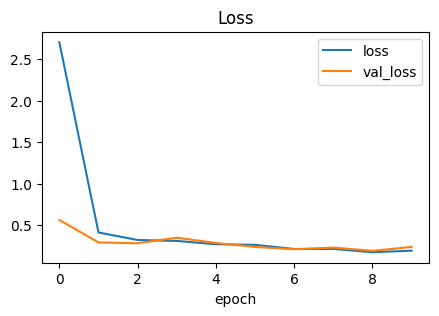

In [ ]:
plt.plot(history_lenet.history['loss'])
plt.plot(history_lenet.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

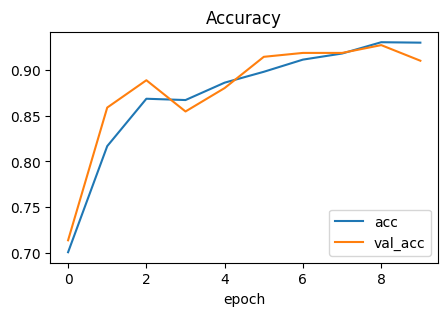

In [ ]:
plt.plot(history_lenet.history['accuracy'])
plt.plot(history_lenet.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

# Matriz de confusion

32/32 [==============================] - 1s 28ms/step


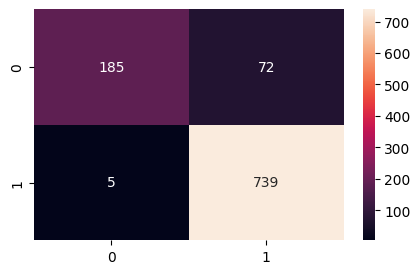

In [ ]:
# Importar las bibliotecas para las métricas de evaluación
from sklearn.metrics import classification_report, confusion_matrix

# Predecir las etiquetas en el conjunto de prueba
y_predict = model_lenet.predict(X_test_lenet)
y_predict_max = np.where(y_predict.ravel() > .5, 1, 0)


# Calcular y mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_predict_max)
sns.heatmap(cm, annot=True, fmt = "d");

# Guardando y descargando el modelo

In [ ]:
model_lenet.save('model_lenet.h5')

from google.colab import files
files.download('model_lenet.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from keras.models import load_model
model_loaded = load_model('model_lenet.h5')


# Pruebas con imagenes

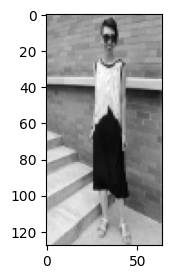

In [ ]:
import urllib.request
url = 'https://www.helloboutique.com/images/items/medium/Sidewalk-Dress-by-Moyuru-7973-16083.jpg'
urllib.request.urlretrieve(url, filename='pedestrian-1.jpg')

# Leer la imagen en color
img_color = mpimg.imread('pedestrian-1.jpg') # no es necesario normalizar. La funcion mpimg.imread entrega un ndarray con valores entre 0 y 1.
# Cambiar el tamaño de la imagen a un tamaño fijo (por ejemplo, (64, 64))
img_color = cv2.resize(img_color, (64, 128))
# Convertir la imagen a escala de grises
img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray,cmap="gray");

In [ ]:
img_resh = img_gray.reshape(1,128,64,1)
prediction = model_loaded.predict(img_resh)
print(prediction)

1/1 [==============================] - 0s 30ms/step
[[1.]]


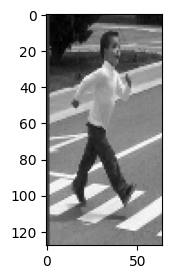

In [ ]:
import urllib.request
url = 'https://4.bp.blogspot.com/_2P-BQVQhnoA/SE5y3zygzDI/AAAAAAAAAAg/Lk2A8PXbAgk/w1200-h630-p-k-no-nu/0001+PEATON.jpg'
urllib.request.urlretrieve(url, filename='pedestrian-2.jpg')

# Leer la imagen en color
img_color = mpimg.imread('pedestrian-2.jpg') # no es necesario normalizar. La funcion mpimg.imread entrega un ndarray con valores entre 0 y 1.
# Cambiar el tamaño de la imagen a un tamaño fijo (por ejemplo, (64, 64))
img_color = cv2.resize(img_color, (64, 128))
# Convertir la imagen a escala de grises
img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray,cmap="gray");

In [ ]:
img_resh = img_gray.reshape(1,128,64,1)
prediction = model_loaded.predict(img_resh)
print(prediction)

1/1 [==============================] - 0s 56ms/step
[[1.]]


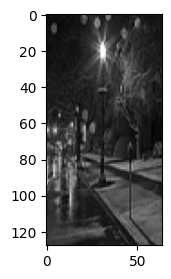

In [ ]:
import urllib.request
url = 'https://render.fineartamerica.com/images/rendered/small/poster/images-square-real/snowy-sidewalk-street-lamp-john-stephens.jpg'
urllib.request.urlretrieve(url, filename='non-pedestrian-1.jpg')

# Leer la imagen en color
img_color = mpimg.imread('non-pedestrian-1.jpg')
# Cambiar el tamaño de la imagen a un tamaño fijo (por ejemplo, (64, 64))
img_color = cv2.resize(img_color, (64, 128))
# Convertir la imagen a escala de grises
img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray,cmap="gray");

# Video Youtube.

EL video procesado se encuentra en el siguiente link:

https://www.youtube.com/watch?v=dNajihiUD5I&t=19s



### Complemento con Keras:
https://github.com/fco-parga/mna-navegacion_autonoma/blob/main/Actividad-4.1/Actividad_4_1_Ejercicio_de_clasificacion_con_Keras.ipynb


# Procesamiento con Torch

In [ ]:
import os
import torch
import torch.nn as nn
import glob
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torch.utils.data import random_split
import numpy as np
from PIL import Image

In [ ]:
# Set device
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
device

In [ ]:
class PedestrianDataset(Dataset):
    def __init__(self, pedestrian_dir, non_pedestrian_dir, transform=None):
        self.pedestrian_dir = pedestrian_dir
        self.non_pedestrian_dir = non_pedestrian_dir
        self.transform = transform

        self.pedestrian_files = sorted(glob.glob(os.path.join(pedestrian_dir, '*.png')))
        self.non_pedestrian_files = sorted(glob.glob(os.path.join(non_pedestrian_dir, '*.png')))

    def __len__(self):
        return len(self.pedestrian_files) + len(self.non_pedestrian_files)

    def __getitem__(self, idx):
        if idx < len(self.pedestrian_files):
            image_file = self.pedestrian_files[idx]
            label = 1  # class 1 for pedestrian
        else:
            image_file = self.non_pedestrian_files[idx - len(self.pedestrian_files)]
            label = 0  # class 0 for non-pedestrian

        image = Image.open(image_file).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
 Define directories
train_pedestrian_dir = "data/INRIAPerson/Train/pos"
train_non_pedestrian_dir = "data/INRIAPerson/Train/neg"
test_pedestrian_dir = "data/INRIAPerson/Test/pos/"
test_non_pedestrian_dir = "data/INRIAPerson/Test/neg/"

# Define transforms

train_transform = transforms.Compose([
    transforms.Resize((200, 200)),
    #  transforms.RandomCrop((32, 64)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandAugment(
        num_ops=2, magnitude=2, interpolation=transforms.InterpolationMode.BILINEAR, ),
    transforms.RandomAffine(
        degrees=(-5, 5), translate=(0, 0.1), scale=(1.0, 1.25), shear=(-10, 10)),
    transforms.ToTensor(),
    transforms.Normalize(
        (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Define transforms for test and validation
test_transform = transforms.Compose([transforms.Resize((200, 200)),
                                                transforms.ToTensor(),
                                                transforms.Normalize(
                                                    (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                                ])

# Initialize dataset and dataloader
train_dataset = PedestrianDataset(
    train_pedestrian_dir, train_non_pedestrian_dir, transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

full_test_dataset = PedestrianDataset(
    test_pedestrian_dir, test_non_pedestrian_dir, transform=test_transform)

# Compute lengths for validation and test splits
val_length = len(full_test_dataset) // 2
test_length = len(full_test_dataset) - val_length

# Perform the split
val_dataset, test_dataset = random_split(
    full_test_dataset, [val_length, test_length])

# Initialize dataloaders
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

In [ ]:
classes = [ 'non-pedestrian', 'pedestrian',]

def previewSomeImages(loader):
    dataiter = iter(loader)
    #dataiter = iter(test_loader)
    images, labels = next(dataiter)
    images = images.numpy() # convert images to numpy for display


    print(images[0].shape)
    # plot the images in the batch, along with the corresponding labels
    fig = plt.figure(figsize=(25, 8))
    # display some images
    images_to_display = 10
    for idx in np.arange(images_to_display):
        ax = fig.add_subplot(2, int(images_to_display/2), idx+1, xticks=[], yticks=[])
        imshow(images[idx])
        ax.set_title(classes[int(labels[idx])])

In [ ]:
previewSomeImages(train_loader)

In [ ]:
class Classifier(nn.Module):
    def __init__(self, num_classes: int = 1000, dropout: float = 0.4) -> None:
        super(Classifier, self).__init__()

        self.features = nn.Sequential(
           nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),   
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1), 
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, padding=1), 
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(160000, 500),  
            nn.Dropout(dropout),
            nn.InstanceNorm1d(500),
            nn.ReLU(inplace=True),
            nn.Linear(500, num_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [ ]:
model = Classifier(num_classes=2)
model = model.to(device)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-3)

In [ ]:
epochs = 20
steps = 0
print_every = 20
running_loss = 0

train_losses, validation_losses = [], []
model.to(device)


for epoch in range(epochs):
    for inputs, labels, in train_loader:
        steps += 1

        # Move inputs and label to the default device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero out the gradients of the optimizer
        optimizer.zero_grad()

        # Get the outputs of the model and compute loss 
        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)

        # Compute the loss gradient using the backward method and have the optimizer take a step
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps % print_every == 0:
            validation_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    validation_loss += batch_loss.item()
                    
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
          
            model.train()
            
            train_losses.append(running_loss/len(train_loader))
            validation_losses.append(validation_loss/len(val_loader))

            print("Epoch: {}/{}.. ".format(epoch+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Validation Loss: {:.3f}.. ".format(validation_loss/len(val_loader)),
              "Validation Accuracy: {:.3f}".format(accuracy/len(val_loader)))
            
            running_loss = 0

In [ ]:
def calculate_accuracy(model, data_loader):
    correct = 0
    total = 0

    # We don't need gradients for test, so wrap in 
    # no_grad to save memory
    with torch.no_grad():
        for data in data_loader:
            images, labels = data
            # If you're using a GPU
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Calculate test accuracy
model = model.to(device)
test_accuracy = calculate_accuracy(model, test_loader)
print(f'Test Accuracy: {test_accuracy}%')

In [ ]:
torch.save(model.state_dict(), "checkpoint.pt")

In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
from tqdm import tqdm
from PIL import Image

class PedestrianDetector:
    def __init__(self, model):
        self.model = model

    def process_frame(self, img):
        # Define parameters for sliding window
        window_size = (200, 200)  # Size of the sliding window
        step_size = 32  # Step size of the sliding window

        # Calculate the starting y-coordinate for the sliding window
        start_y = img.shape[0] // 2 - 50
        end_y = int(img.shape[0] * 0.7)

        transform = transforms.Compose([transforms.Resize((200,200)), 
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                        ])

        # Slide the window over the image
        for y in range(start_y, end_y, step_size):
            for x in range(0, img.shape[1], step_size):
                # Extract the region of interest
                roi = img[y:y + window_size[1], x:x + window_size[0]]

                # Skip if the region of interest is not the same size as the window
                if roi.shape[0] != window_size[1] or roi.shape[1] != window_size[0]:
                    continue
                roi_pil = Image.fromarray(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

                # Convert the region of interest to a PyTorch tensor and normalize
                roi_tensor = transform(roi_pil).unsqueeze(0)
                
                # Move the tensor to the same device as the model
                roi_tensor = roi_tensor.to(next(self.model.parameters()).device)

                # Predict whether the region of interest contains a pedestrian
                with torch.no_grad():
                    outputs = self.model(roi_tensor)
                    probabilities = torch.nn.functional.softmax(outputs.data, dim=1)
                
                # If a pedestrian is detected, draw a rectangle around the region of interest
                if probabilities[0][1] > 0.9:
                    cv2.rectangle(img, (x, y), (x + window_size[0], y + window_size[1]), (0, 255, 0), 2)

        return img


    def process_video(self, input_video_path, output_video_path):
        cap = cv2.VideoCapture(input_video_path)
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        # Calculate the number of frames to process (100% of total frames)
        num_frames_to_process = int(total_frames * 1)

        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

        pbar = tqdm(total=num_frames_to_process, ncols=80, bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt}')

        frame_count = 0

        while cap.isOpened():
            ret, frame = cap.read()
            if ret:
                result_frame = self.process_frame(frame)
                out.write(result_frame)
                cv2.imshow('Processed Frame', result_frame)

                pbar.update(1)
                frame_count += 1

                if frame_count >= num_frames_to_process:
                    break

                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
            else:
                break

        pbar.close()

        cap.release()
        out.release()
        cv2.destroyAllWindows()

input_video_path = 'video_2_2.mp4'
output_video_path = 'output_video_2_3.mp4'
pedestrian_detector = PedestrianDetector(model)
pedestrian_detector.process_video(input_video_path, output_video_path)